In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import subprocess
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm, rc
from mpl_toolkits.mplot3d import Axes3D
from cot.config import SAVE_DIR

WIDTH = 5.5            # inches (from ICML style file)
HEIGHT = 5.5 / 1.5     # golden ratio


rc('font', family='serif', size=8)
usetex = not subprocess.run(['which', 'pdflatex']).returncode
rc('text', usetex=usetex)
if usetex:
    rc('text.latex', preamble=r'\usepackage{times}')

/home/vivc/.local/share/texlive/2022/bin/x86_64-linux/pdflatex


In [3]:
exp = 1
attention_eval = True
problems = ["parity", "no-cot", "binary-copy"]

save_dir = SAVE_DIR / f"res-cot-exp{exp}"

x = np.arange(4, 32)
y = np.arange(8, 128)
t = np.arange(0, 5001, 10)

Z1, Z2, Z3, Z4 = {}, {}, {}, {}

for problem in problems:
    Z1[problem] = np.load(save_dir / f"train_acc_{problem}.npy")
    Z2[problem] = np.load(save_dir / f"test_acc_{problem}.npy")

    if attention_eval:
        Z3[problem] = np.load(save_dir / f"attn0_{problem}.npy")
        Z4[problem] = np.load(save_dir / f"attn1_{problem}.npy")

In [4]:
for Zi in (
    list(Z1.values())
    + list(Z2.values())
    + list(Z3.values())
    + list(Z4.values())
):
    # tmp = np.repeat(Zi.mean(axis=1)[:, np.newaxis, :], Zi.shape[1], axis=1)
    # Zi[Zi == -1] = tmp[Zi == -1]
    Zi[Zi == -1] = 1

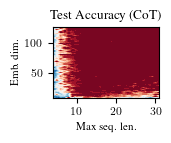

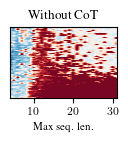

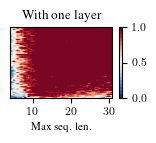

In [5]:
data = Z2['parity']
X, Y = np.meshgrid(x, y)
fig, ax = plt.subplots(1, 1, figsize=(.25 * WIDTH, .25 * HEIGHT))
a = ax.contourf(X, Y, data[:, :, -1].T, cmap='RdBu_r', vmin=0, vmax=1, levels=20)
# c = fig.colorbar(a)
# c.set_ticks([0, .5, 1])
ax.set_xlabel('Max seq. len.')
ax.set_ylabel('Emb. dim.')
ax.set_title('Test Accuracy (CoT)')
fig.savefig('parity.pdf', bbox_inches='tight')

data = Z2['no-cot']
X, Y = np.meshgrid(x, y)
fig, ax = plt.subplots(1, 1, figsize=(.25 * WIDTH, .25 * HEIGHT))
a = ax.contourf(X, Y, data[:, :, -1].T, cmap='RdBu_r', vmin=0, vmax=1, levels=20)
# c = fig.colorbar(a)
# c.set_ticks([0, .5, 1])
ax.set_xlabel('Max seq. len.')
ax.set_yticks([])
# ax.set_ylabel('Emb. dim.')
ax.set_title('Without CoT')
fig.savefig('nocot.pdf', bbox_inches='tight')

data = Z2['parity']
X, Y = np.meshgrid(x, y)
fig, ax = plt.subplots(1, 1, figsize=(.3 * WIDTH, .25 * HEIGHT))
a = ax.contourf(X, Y, data[:, :, -1].T, cmap='RdBu_r', vmin=0, vmax=1, levels=20)
c = fig.colorbar(a)
c.set_ticks([0, .5, 1])
ax.set_xlabel('Max seq. len.')
ax.set_yticks([])
# ax.set_ylabel('Emb. dim.')
ax.set_title('With one layer')
fig.savefig('onelayer.pdf', bbox_inches='tight')

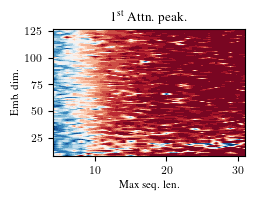

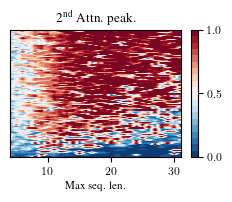

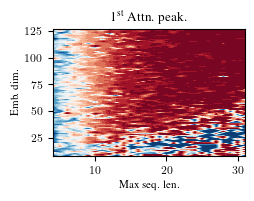

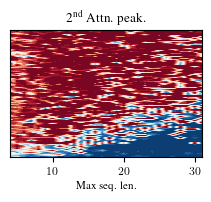

In [6]:
data = Z3['parity']
X, Y = np.meshgrid(x, y)
fig, ax = plt.subplots(1, 1, figsize=(.45 * WIDTH, .45 * HEIGHT))
a = ax.contourf(X, Y, data[:, :, -1].T, cmap='RdBu_r', vmin=0, vmax=1, levels=20)
# c = fig.colorbar(a)
# c.set_ticks([0, .5, 1])
ax.set_xlabel('Max seq. len.')
ax.set_ylabel('Emb. dim.')
ax.set_title(r'1\textsuperscript{st} Attn. peak.')
fig.savefig('parity_attn0.pdf', bbox_inches='tight')

data = Z4['parity']
X, Y = np.meshgrid(x, y)
fig, ax = plt.subplots(1, 1, figsize=(.5 * WIDTH, .45 * HEIGHT))
a = ax.contourf(X, Y, data[:, :, -1].T, cmap='RdBu_r', vmin=0, vmax=1, levels=20)
c = fig.colorbar(a)
c.set_ticks([0, .5, 1])
ax.set_xlabel('Max seq. len.')
ax.set_yticks([])
# ax.set_ylabel('Emb. dim.')
ax.set_title(r'2\textsuperscript{nd} Attn. peak.')
fig.savefig('parity_attn1.pdf', bbox_inches='tight')

data = Z3['binary-copy']
X, Y = np.meshgrid(x, y)
fig, ax = plt.subplots(1, 1, figsize=(.45 * WIDTH, .45 * HEIGHT))
a = ax.contourf(X, Y, data[:, :, -1].T, cmap='RdBu_r', vmin=0, vmax=1, levels=20)
# c = fig.colorbar(a)
# c.set_ticks([0, .5, 1])
ax.set_xlabel('Max seq. len.')
ax.set_ylabel('Emb. dim.')
ax.set_title(r'1\textsuperscript{st} Attn. peak.')
fig.savefig('copy_attn0.pdf', bbox_inches='tight')

data = Z4['binary-copy']
X, Y = np.meshgrid(x, y)
fig, ax = plt.subplots(1, 1, figsize=(.45 * WIDTH, .45 * HEIGHT))
a = ax.contourf(X, Y, data[:, :, -1].T, cmap='RdBu_r', vmin=0, vmax=1, levels=20)
# c = fig.colorbar(a)
# c.set_ticks([0, .5, 1])
ax.set_xlabel('Max seq. len.')
ax.set_yticks([])
# ax.set_ylabel('Emb. dim.')
ax.set_title(r'2\textsuperscript{nd} Attn. peak.')
fig.savefig('copy_attn1.pdf', bbox_inches='tight')

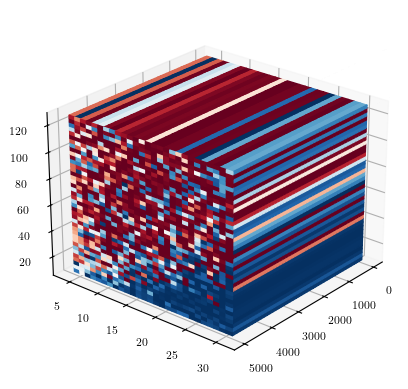

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

T, X = np.meshgrid(t, x)
ax.plot_surface(T, X, np.full_like(T, y[-1]), facecolors=cm.RdBu_r(data[:,-1,:]), shade=False)
T, Y = np.meshgrid(t, y)
ax.plot_surface(T, np.full_like(T, x[-1]), Y, facecolors=cm.RdBu_r(data[-1,:,:]), shade=False)
X, Y = np.meshgrid(x, y)
ax.plot_surface(np.full_like(X, t[-1]), X, Y, facecolors=cm.RdBu_r(data[:,:,-1].T), shade=False)
ax.view_init(elev=25, azim=40)
